# My Project

## Import necessary libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
#!conda install -c conda-forge folium=0.5.0 --yes
#import folium # plotting library

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

## set details for Foursquare API connection

In [7]:
# The code was removed by Watson Studio for sharing.

## Get relevant part of JSON and transform it into a pandas dataframe

In [8]:
global dataframe
dataframe = pd.DataFrame()

In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

#send api call through function 
def get_data(qry):
    #within 1.5km
    radius = 1500
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, qry, radius, LIMIT)
    print('ll={},{}&v={}&query={}&radius={}&limit={}'.format(latitude, longitude, VERSION, qry, radius, LIMIT))
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    td = json_normalize(venues)
    td['rgroup'] = qry
    return td


# Loop through restaurants

In [10]:
query = ["italian","thai","steak","sandwich","sushi","french","mexican"]

#address = 'First Canadian Place, 100 King St W, Toronto, ON M5X 1A9, Canada'
latitude = 43.649039
longitude = -79.381466

#clear dataframe
dataframe.drop(dataframe.index, inplace=True)

for x in query:
    tmpframe = get_data(x)
    #print(tmpframe)
    dataframe = dataframe.append(tmpframe,ignore_index=True)

dataframe.head()

#dataframe_filtered

ll=43.649039,-79.381466&v=20180604&query=italian&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=thai&radius=1500&limit=30


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


ll=43.649039,-79.381466&v=20180604&query=steak&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=sandwich&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=sushi&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=french&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=mexican&radius=1500&limit=30


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,rgroup,venuePage.id
0,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,5b897e92db1d81002c91df8c,66 Wellington St W,CA,Toronto,Canada,NaN,209,"[66 Wellington St W, Toronto ON M5K 1E7, Canada]","[{'label': 'display', 'lat': 43.647161, 'lng':...",43.647161,-79.381691,NaN,M5K 1E7,ON,Fabbrica Rustic Italian,v-1581492775,italian,NaN
1,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,52f6816f11d24a43115dc834,"382 Yonge Street, Unit #7",CA,Toronto,Canada,Gerrard,1105,"[382 Yonge Street, Unit #7 (Gerrard), Toronto ...","[{'label': 'display', 'lat': 43.65892029202872...",43.658920,-79.382891,NaN,M5B 1S8,ON,Scaddabush Italian Kitchen & Bar,v-1581492775,italian,NaN
2,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,581cad6a7c74e15859a6f890,200 Front St W,CA,Toronto,Canada,at Simcoe St,572,"[200 Front St W (at Simcoe St), Toronto ON M5V...","[{'label': 'display', 'lat': 43.6447367776608,...",43.644737,-79.385355,NaN,M5V 3J1,ON,Scaddabush Italian Kitchen & Bar,v-1581492775,italian,NaN
3,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,4f88cf84e4b002b90ab3b9b9,NaN,CA,NaN,Canada,NaN,302,[Canada],"[{'label': 'display', 'lat': 43.65053979517576...",43.650540,-79.384603,NaN,NaN,NaN,LA's Italian + Bar,v-1581492775,italian,NaN
4,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",False,4c787c9181bca0936180fa14,CNE Midway,CA,Toronto,Canada,NaN,346,"[CNE Midway, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.652144, 'lng':...",43.652144,-79.381118,NaN,NaN,ON,Classic italian style pizza food truck,v-1581492775,italian,NaN


In [11]:
dataframe.count()

categories                   159
hasPerk                      159
id                           159
location.address             137
location.cc                  159
location.city                143
location.country             159
location.crossStreet          82
location.distance            159
location.formattedAddress    159
location.labeledLatLngs      159
location.lat                 159
location.lng                 159
location.neighborhood          5
location.postalCode           98
location.state               143
name                         159
referralId                   159
rgroup                       159
venuePage.id                   4
dtype: int64

## Clean results and keep only filtered data

In [12]:
#clean results
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories', 'rgroup'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.head()

,name,categories,rgroup,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Fabbrica Rustic Italian,Italian Restaurant,italian,66 Wellington St W,CA,Toronto,Canada,NaN,209,"[66 Wellington St W, Toronto ON M5K 1E7, Canada]","[{'label': 'display', 'lat': 43.647161, 'lng':...",43.647161,-79.381691,NaN,M5K 1E7,ON,5b897e92db1d81002c91df8c
1,Scaddabush Italian Kitchen & Bar,Italian Restaurant,italian,"382 Yonge Street, Unit #7",CA,Toronto,Canada,Gerrard,1105,"[382 Yonge Street, Unit #7 (Gerrard), Toronto ...","[{'label': 'display', 'lat': 43.65892029202872...",43.658920,-79.382891,NaN,M5B 1S8,ON,52f6816f11d24a43115dc834
2,Scaddabush Italian Kitchen & Bar,Italian Restaurant,italian,200 Front St W,CA,Toronto,Canada,at Simcoe St,572,"[200 Front St W (at Simcoe St), Toronto ON M5V...","[{'label': 'display', 'lat': 43.6447367776608,...",43.644737,-79.385355,NaN,M5V 3J1,ON,581cad6a7c74e15859a6f890
3,LA's Italian + Bar,Italian Restaurant,italian,NaN,CA,NaN,Canada,NaN,302,[Canada],"[{'label': 'display', 'lat': 43.65053979517576...",43.650540,-79.384603,NaN,NaN,NaN,4f88cf84e4b002b90ab3b9b9
4,Classic italian style pizza food truck,Food Truck,italian,CNE Midway,CA,Toronto,Canada,NaN,346,"[CNE Midway, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.652144, 'lng':...",43.652144,-79.381118,NaN,NaN,ON,4c787c9181bca0936180fa14


In [13]:
#Clean Data and remove unnecessary headings
dfrest = dataframe_filtered[dataframe_filtered.categories != 'Embassy / Consulate']
dfrest = dfrest[dfrest.categories != 'Residential Building (Apartment / Condo)']
dfrest = dfrest[dfrest.categories != 'Neighborhood']
dfrest = dfrest[dfrest.categories != 'Gym / Fitness Center']
dfrest = dfrest[dfrest.categories != 'Clothing Store']
dfrest = dfrest[dfrest.categories != 'Government Building']

dfrest['rgroup'].value_counts()


sushi       30
thai        29
sandwich    28
steak       24
mexican     18
italian     15
french       4
Name: rgroup, dtype: int64

## Create bar chart showing restaurants per group

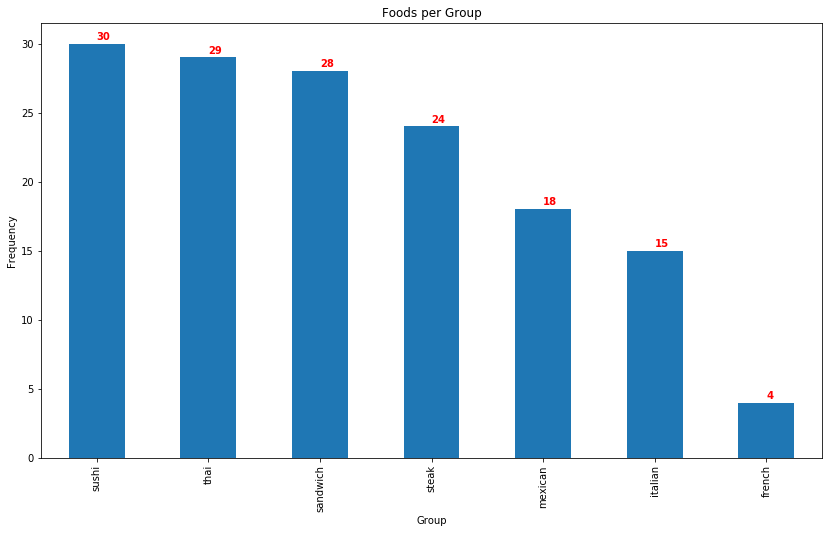

In [14]:
ax = dfrest['rgroup'].value_counts().plot(kind='bar',figsize=(14,8),title="Foods per Group")
ax.set_xlabel("Group")
ax.set_ylabel("Frequency")

y = dfrest['rgroup'].value_counts()
for i, v in enumerate(y):
    ax.text(i, v+0.3, str(v), color='red', fontweight='bold')

plt.show()

In [15]:
# The code was removed by Watson Studio for sharing.

,num,id,avgprice,type
0,0,5b897e92db1d81002c91df8c,24,italian
1,1,52f6816f11d24a43115dc834,11,italian
2,2,581cad6a7c74e15859a6f890,57,italian
3,3,4f88cf84e4b002b90ab3b9b9,14,italian
4,4,4c787c9181bca0936180fa14,52,italian


## left join average price to main dataframe
## Delete unnecessary columns

In [16]:
dB = df_data_csv[['id','avgprice']]
df = pd.merge(dfrest, dB, on='id')

del df['address']
del df['cc']
del df['city']
del df['crossStreet']
del df['formattedAddress']
del df['labeledLatLngs']
del df['country']
del df['state']
del df['categories']

df.head()

,name,rgroup,distance,lat,lng,neighborhood,postalCode,id,avgprice
0,Fabbrica Rustic Italian,italian,209,43.647161,-79.381691,NaN,M5K 1E7,5b897e92db1d81002c91df8c,24
1,Scaddabush Italian Kitchen & Bar,italian,1105,43.658920,-79.382891,NaN,M5B 1S8,52f6816f11d24a43115dc834,11
2,Scaddabush Italian Kitchen & Bar,italian,572,43.644737,-79.385355,NaN,M5V 3J1,581cad6a7c74e15859a6f890,57
3,LA's Italian + Bar,italian,302,43.650540,-79.384603,NaN,NaN,4f88cf84e4b002b90ab3b9b9,14
4,Classic italian style pizza food truck,italian,346,43.652144,-79.381118,NaN,NaN,4c787c9181bca0936180fa14,52


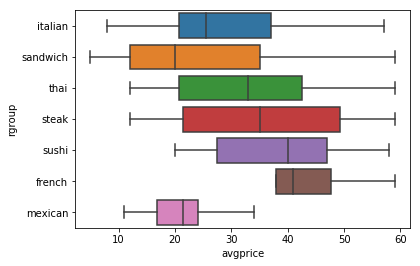

In [17]:
sns.boxplot( y=df["rgroup"], x=df["avgprice"] );
plt.show()

## Convert data from categorical to numerical so 
## it can be plotted and analyzed in 3d KMeans analysis

In [18]:
df.rgroup = pd.Categorical(df.rgroup)
df['rgroupnum'] = df.rgroup.cat.codes

## Save restaurant type, distance from building and average price to new dataframe
## Predict with KMeans on these attributes

In [19]:
X = df[['rgroupnum','distance','avgprice']]
X.head(10)

,rgroupnum,distance,avgprice
0,1,209,24
1,1,1105,11
2,1,572,57
3,1,302,14
4,1,346,52
5,1,749,27
6,1,804,36
7,1,841,35
8,1,924,24
9,1,1237,57


### Normalize the data

In [20]:
X1 = scale(df.distance)
X2 = scale(df.avgprice)
X3 = scale(df.rgroupnum)
dClust = pd.DataFrame()
dClust['distance'] = X1
dClust['avgprice'] = X2
dClust['rgroupnum'] = X3
dClust.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,distance,avgprice,rgroupnum
0,-1.232349,-0.480024,-1.558159
1,0.615532,-1.350212,-1.558159
2,-0.483710,1.728913,-1.558159
3,-1.040549,-1.149399,-1.558159
4,-0.949805,1.394225,-1.558159


In [21]:
k_means_nrm = KMeans(n_clusters=7, random_state=9)
y = k_means_nrm.fit_predict(dClust[['rgroupnum', 'distance', 'avgprice']])
df['Cluster'] = y
df.head(10)

,name,rgroup,distance,lat,lng,neighborhood,postalCode,id,avgprice,rgroupnum,Cluster
0,Fabbrica Rustic Italian,italian,209,43.647161,-79.381691,NaN,M5K 1E7,5b897e92db1d81002c91df8c,24,1,1
1,Scaddabush Italian Kitchen & Bar,italian,1105,43.658920,-79.382891,NaN,M5B 1S8,52f6816f11d24a43115dc834,11,1,6
2,Scaddabush Italian Kitchen & Bar,italian,572,43.644737,-79.385355,NaN,M5V 3J1,581cad6a7c74e15859a6f890,57,1,3
3,LA's Italian + Bar,italian,302,43.650540,-79.384603,NaN,NaN,4f88cf84e4b002b90ab3b9b9,14,1,1
4,Classic italian style pizza food truck,italian,346,43.652144,-79.381118,NaN,NaN,4c787c9181bca0936180fa14,52,1,3
5,Kit Kat Italian Bar & Grill,italian,749,43.646416,-79.390030,NaN,M5V 1J5,4b3ace79f964a520ae6e25e3,27,1,1
6,Mustachio Italian Eatery,italian,804,43.656160,-79.383190,NaN,M5G 2C2,573df789498e03dd8e54b166,36,1,3
7,The Fresh Italian,italian,841,43.654991,-79.387897,NaN,NaN,51bf3866498e55ee55df8db0,35,1,3
8,The Fresh Italian Eatery,italian,924,43.653889,-79.390785,NaN,M5T 3K5,526fe29411d2aeb3803013b0,24,1,1
9,john's italian cafe,italian,1237,43.656127,-79.393301,NaN,NaN,53daae5b498e9c9597c19b23,57,1,3


## in scatter plot show restaurant types with walking distance
## shows how the kmeans clustered the data together.

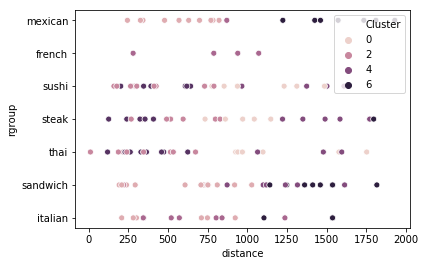

In [22]:
sns.scatterplot(x="distance", y="rgroup", hue=df['Cluster'], data=df)
#print (classification_report(y,df['Cluster']))

## Find average price per Cluster

In [23]:
df[['Cluster','avgprice']].groupby(['Cluster'], as_index=False).mean()

,Cluster,avgprice
0,0,24.882353
1,1,19.607143
2,2,47.592593
3,3,43.538462
4,4,48.555556
5,5,22.652174
6,6,16.650000


## average price per cuisine

In [24]:
df[['rgroup','avgprice']].groupby(['rgroup'], as_index=False).mean()

,rgroup,avgprice
0,french,44.750000
1,italian,29.750000
2,mexican,21.500000
3,sandwich,24.862069
4,steak,35.041667
5,sushi,38.111111
6,thai,32.785714


#### Conclusion:  sushi is the most saturated with more than 30 restaurants
#### therefore one can either go with thai (2nd highest) with an avg price of USD 33 or
#### go for the least saturdated market (french) with only 4 restaurants, avg price of USD 45
#### French might be better as there's less competition and a higher price attached

### Finally a 3D of KMean Clusters

In [25]:
dClust.head()

,distance,avgprice,rgroupnum
0,-1.232349,-0.480024,-1.558159
1,0.615532,-1.350212,-1.558159
2,-0.483710,1.728913,-1.558159
3,-1.040549,-1.149399,-1.558159
4,-0.949805,1.394225,-1.558159


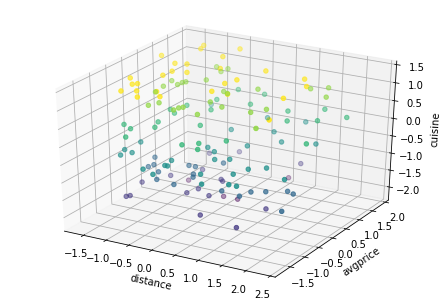

In [26]:
from sklearn.datasets import make_blobs

# Creating a sample dataset with 7 clusters
KMX, KMY = make_blobs(n_samples=800, n_features=3, centers=7)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('distance')
ax.set_ylabel('avgprice')
ax.set_zlabel('cuisine')
ax.scatter(dClust.iloc[:, 0], dClust.iloc[:, 1], dClust.iloc[:, 2], c=dClust.iloc[:, 2])
plt.rcParams['figure.figsize'] = (16, 9)
